In [2]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ----------------------- --------------- 61.4/100.0 kB 825.8 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 823.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [6]:
df = pd.read_csv(r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [7]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [8]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

### TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

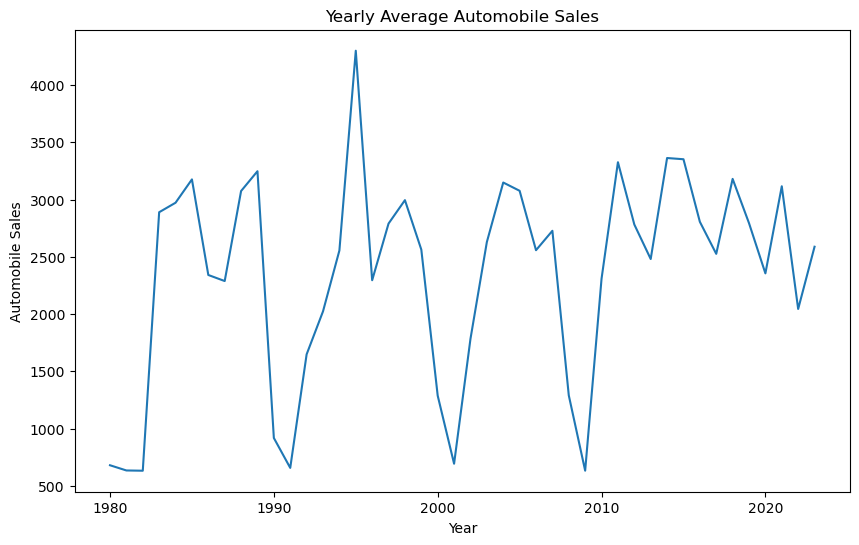

In [10]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Yearly Average Automobile Sales')
plt.show()

### Showing Recession Periods Text

In [11]:
df2=df[df['Recession']==1]
df2['Year'].unique()


array([1980, 1981, 1982, 1983, 1990, 1991, 1992, 2000, 2001, 2002, 2008,
       2009, 2020], dtype=int64)

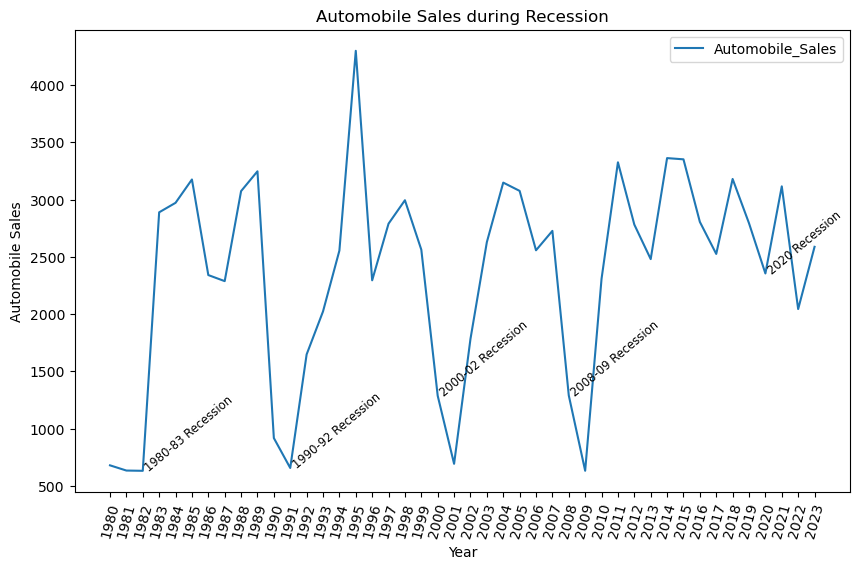

In [12]:
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, df_line[1982], '1980-83 Recession', size= 'small', rotation = 40)
plt.text(1991, df_line[1991], '1990-92 Recession', size= 'small', rotation=40)
plt.text(2000, df_line[2000], '2000-02 Recession', size= 'small', rotation=40)
plt.text(2008, df_line[2008], '2008-09 Recession', size= 'small', rotation=40)
plt.text(2020, df_line[2020], '2020 Recession', size= 'small', rotation=40)
plt.legend()
plt.show()

### TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

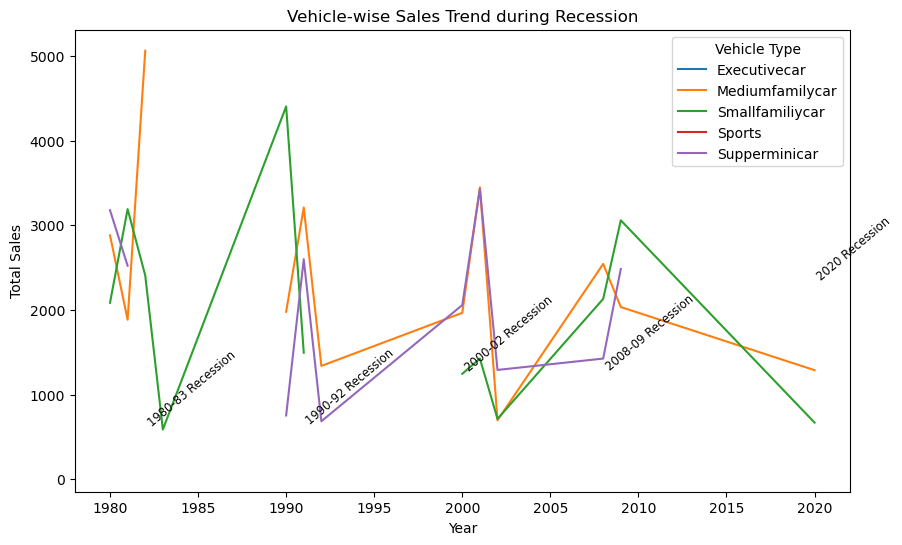

In [13]:
df_Vlines = df[df['Recession'] == 1].groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()
plt.figure(figsize=(10, 6))
df_Vlines.plot(kind='line', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Vehicle-wise Sales Trend during Recession')
plt.text(1982, df_line[1982], '1980-83 Recession', size= 'small', rotation = 40)
plt.text(1991, df_line[1991], '1990-92 Recession', size= 'small', rotation=40)
plt.text(2000, df_line[2000], '2000-02 Recession', size= 'small', rotation=40)
plt.text(2008, df_line[2008], '2008-09 Recession', size= 'small', rotation=40)
plt.text(2020, df_line[2020], '2020 Recession', size= 'small', rotation=40)
plt.legend(title='Vehicle Type')
plt.show()

##### Comments: Data shows that superminicar and smallfamilycar sales kept on increased although at low rates. However, sales of Sports type vehicles' declined because of the high cost of the vehicle.

### TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [14]:
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
dd


,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222
5,1,Executivecar,564.000000
6,1,Mediumfamilycar,674.847619
7,1,Smallfamiliycar,650.733333
8,1,Sports,170.333333
9,1,Supperminicar,659.270968


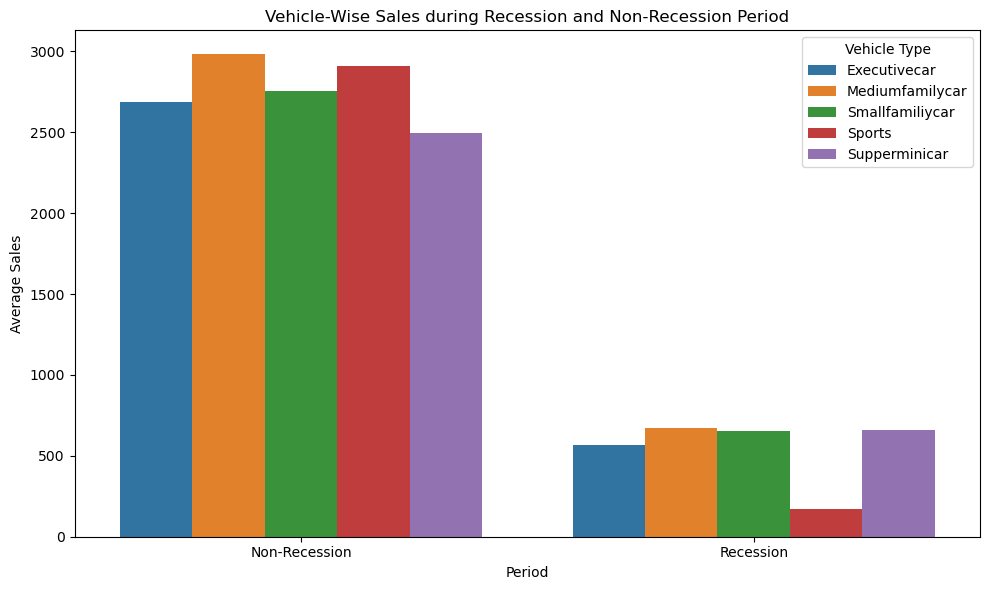

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

##### Comments: The Bar Chart shows that during the recession period, the sales of all vehicels have declined (with sports vehicles being affected the most)

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period

C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

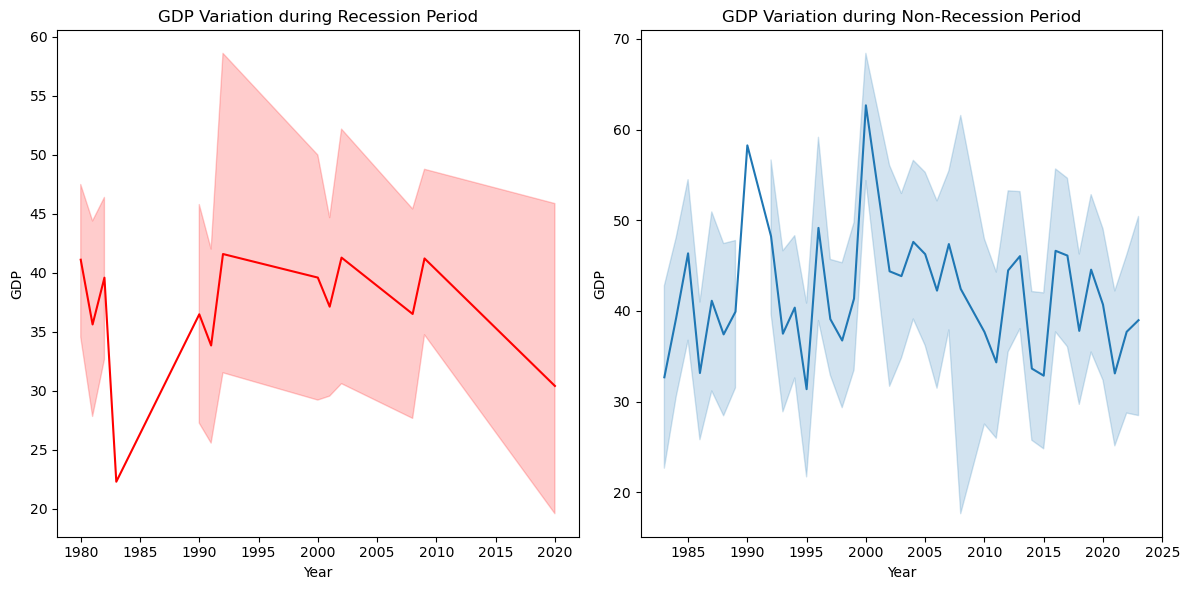

In [16]:
rec_df = df[df['Recession'] == 1]
non_rec_df = df[df['Recession'] == 0]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.lineplot(x='Year', y='GDP', data=rec_df, ax=ax0, c='red')
ax0.set_title('GDP Variation during Recession Period')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')

sns.lineplot(x='Year', y='GDP', data=non_rec_df, ax=ax1)
ax1.set_title('GDP Variation during Non-Recession Period')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

plt.tight_layout()
plt.show()

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

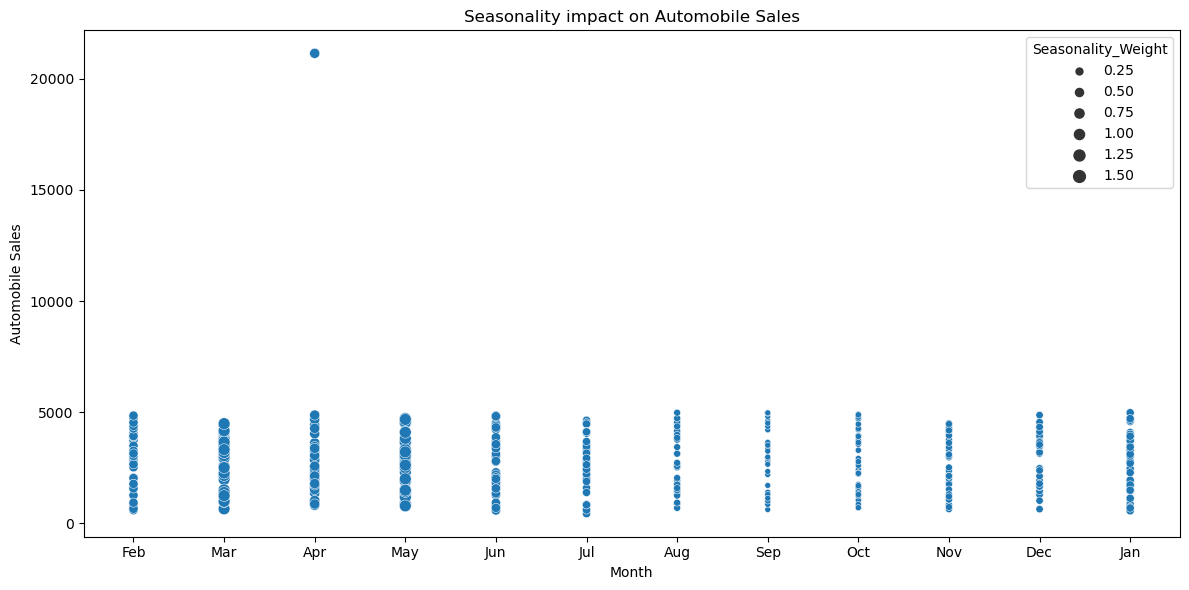

In [17]:
non_rec_df = df[df['Recession'] == 0]

s = non_rec_df['Seasonality_Weight']   

plt.figure(figsize=(12, 6))
sns.scatterplot(data=non_rec_df, x='Month', size=s, y='Automobile_Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.tight_layout()
plt.show()

### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

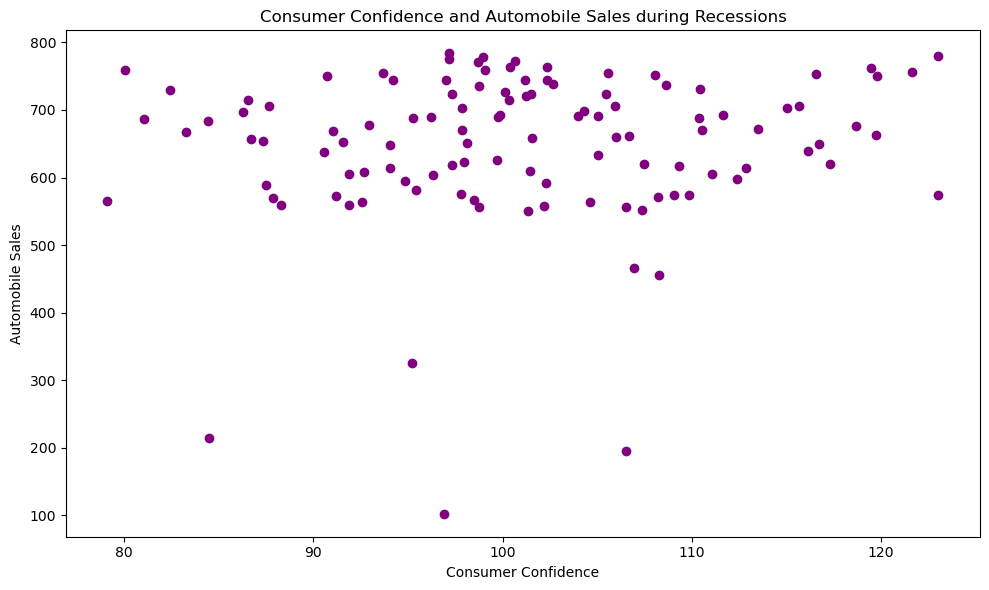

In [18]:
rec_df = df[df['Recession'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(rec_df['Consumer_Confidence'], rec_df['Automobile_Sales'], c='purple')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.tight_layout()
plt.show()

### How does the average vehicle price relate to the sales volume during recessions?

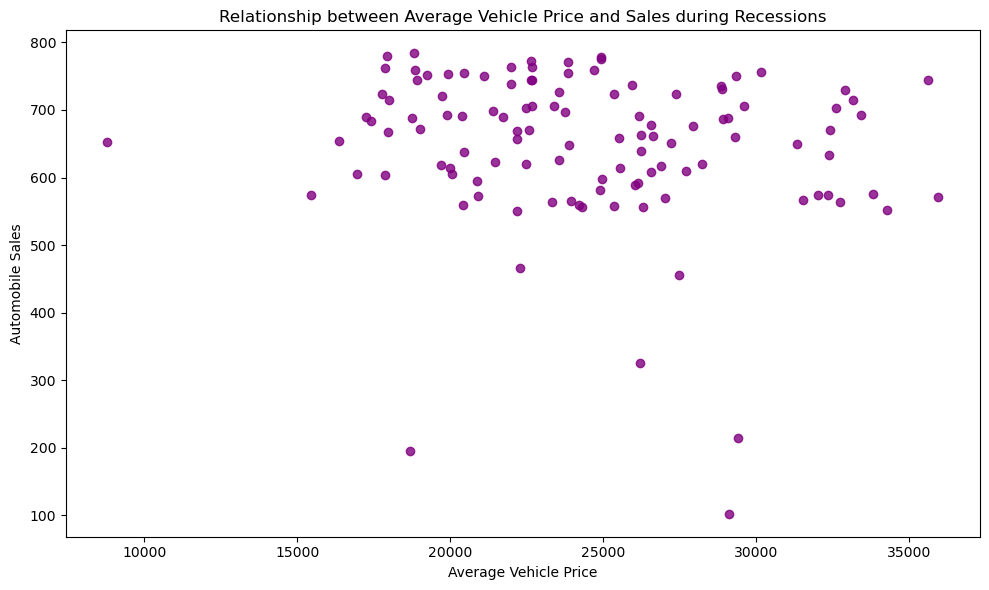

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(rec_df['Price'], rec_df['Automobile_Sales'], alpha=0.8, color='purple')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.tight_layout()
plt.show()

### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.


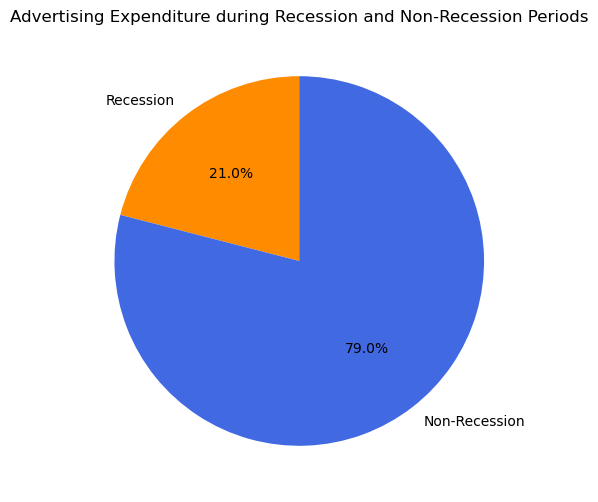

In [20]:
rec_df = df[df['Recession'] == 1]
non_rec_df = df[df['Recession'] == 0]

RAtotal = rec_df['Advertising_Expenditure'].sum()
NRAtotal = non_rec_df['Advertising_Expenditure'].sum()

plt.figure(figsize=(10, 6))
labels = ['Recession', 'Non-Recession']
pie = [RAtotal, NRAtotal]
plt.pie(pie, labels=labels, autopct='%1.1f%%', startangle=90, colors=['darkorange','royalblue'])
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')


plt.show()

##### Comments: Pie chart shows that ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.


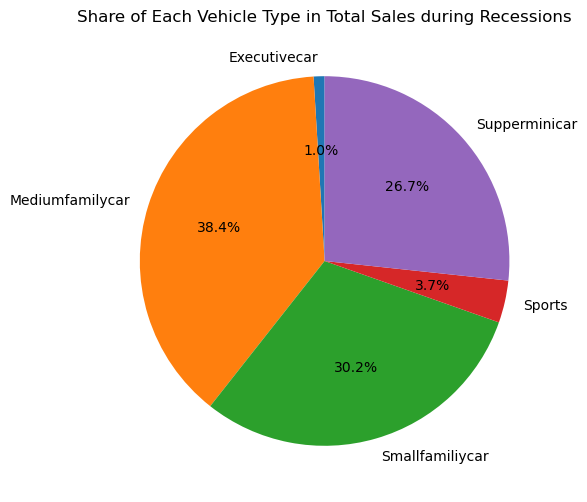

In [21]:
Rdata = df[df['Recession'] == 1]

VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(10, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')
plt.show()

### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period

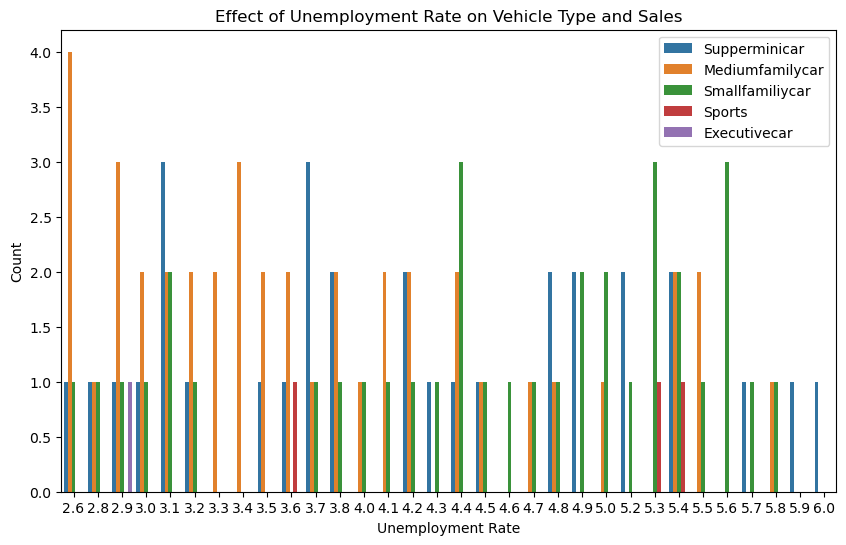

In [22]:
Rdata= df[df['Recession'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(data=Rdata, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')

plt.show()

#### Comments: From the count plot visualizing the effect of the unemployment rate on vehicle type sales during the recession, the following observations can be made:

Superminicar: As the unemployment rate increases, sales of superminicars tend to increase. This suggests that during times of economic downturn, consumers may prefer more economical and affordable vehicles.

Smallfamilycar: Similarly, the sales of small family cars also show an upward trend with increasing unemployment rates. This further supports the notion that during a recession, consumers might be more inclined towards vehicles that are more cost-effective and provide better value for money.

Mediumminicar: The sales trend for medium minicars appears to be somewhat consistent across varying unemployment rates. This suggests that medium minicars might be a popular choice irrespective of the economic conditions, possibly due to their balance between affordability and features.

In summary, during recession periods characterized by higher unemployment rates, there seems to be a shift in consumer preference towards more affordable vehicle options. This behavior can be attributed to the financial constraints and uncertainty that people face during such times, leading them to make more conservative spending decisions.

### TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period using folium library

In [25]:
import folium

Rdata = df[df['Recession'] == 1]

sales_by_city = Rdata.groupby('City')['Automobile_Sales'].sum().reset_index()
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
choropleth = folium.Choropleth(
    geo_data= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

map1